In [3]:
# Importing Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [4]:
#import 2019 data

csvpath_2019 = os.path.join('Resources', '2019.csv')
csv_2019 = pd.read_csv(csvpath_2019)
csv_2019.head(15)

#import happy_region df so we can merge and make region column

csvpath_region = os.path.join('happy_regions.csv')
csv_happy_regions = pd.read_csv(csvpath_region)

#lets take out just country and region columns
new_region_df = csv_happy_regions[["Country", "Region"]]

#rename column so it matches with the newly structured csv below
new_region_df = new_region_df.rename(columns={"Country": "Country or region"})

#let's merge df with region category with csv 2019
merged_2019 = pd.merge(csv_2019, new_region_df, on="Country or region")
merged_2019

#write it as csv so we can look at it
#output file for data
output_file = os.path.join("2019_csv_regions.csv")
#open output file
with open(output_file, 'w') as datafile:
    merged_2019.to_csv(output_file)

merged_2019.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Europe
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Australia and New Zealand
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Europe


slope:0.28
intercept:-0.63
R-squared: 0.6303
y=0.28x + -0.63


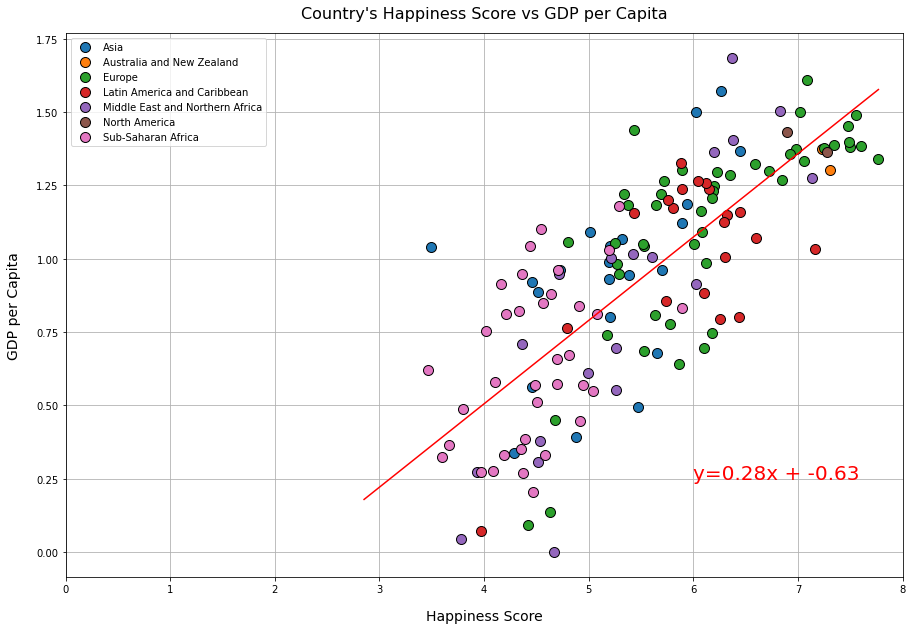

In [8]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_2019["Score"]
y_values = csv_2019["GDP per capita"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2019["Country or region"]
region = merged_2019["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()
   
    
#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("GDP per Capita", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs GDP per Capita", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.25), fontsize =20, color = "red")
plt.show()

slope:0.21
intercept:0.08
R-squared: 0.6038
y=0.21x + 0.08


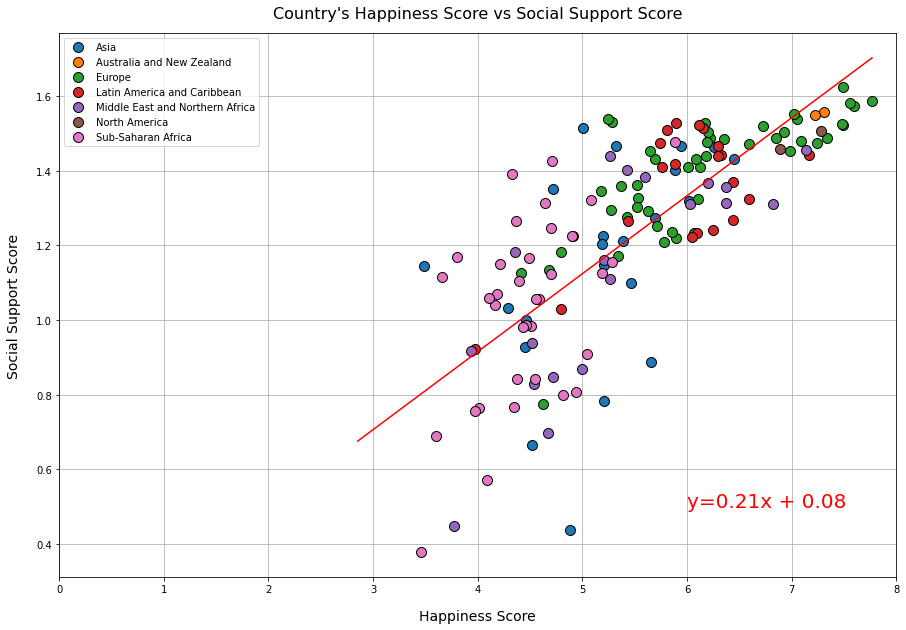

In [9]:
#scatter plot away!

#scatter plot: happiness score vs social support

#establish x and y values
x_values = csv_2019["Score"]
y_values = csv_2019["Social support"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2019["Country or region"]
region = merged_2019["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()
    
#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Social Support Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Social Support Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.5), fontsize =20, color = "red")
plt.show()

slope:0.17
intercept:-0.19
R-squared: 0.6082
y=0.17x + -0.19


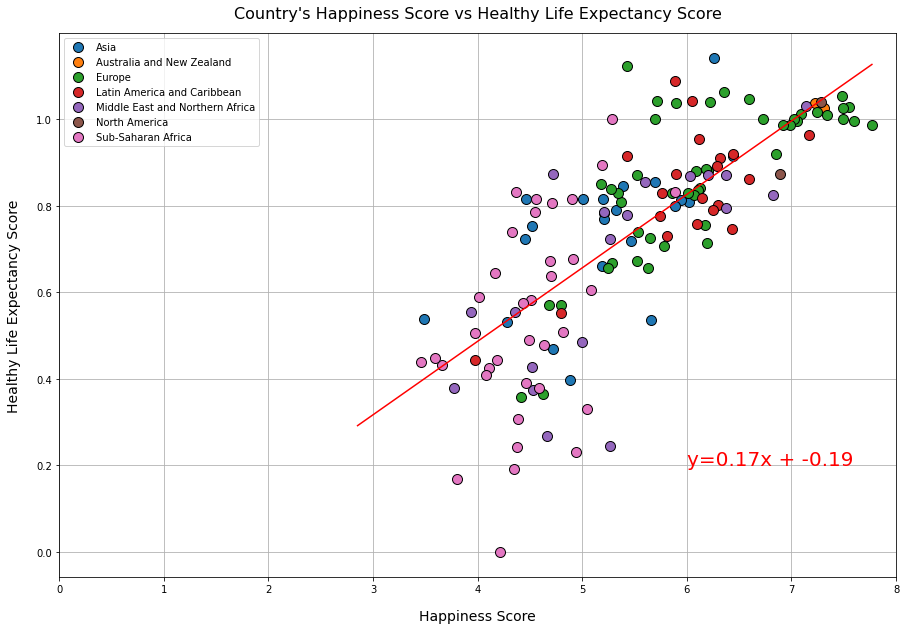

In [10]:
#scatter plot away!

#scatter plot: happiness score vs Healthy life expectancy

#establish x and y values
x_values = csv_2019["Score"]
y_values = csv_2019["Healthy life expectancy"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2019["Country or region"]
region = merged_2019["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()
#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Healthy Life Expectancy Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Healthy Life Expectancy Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.2), fontsize =20, color = "red")
plt.show()

slope:0.07
intercept:-0.0
y=0.07x + -0.0


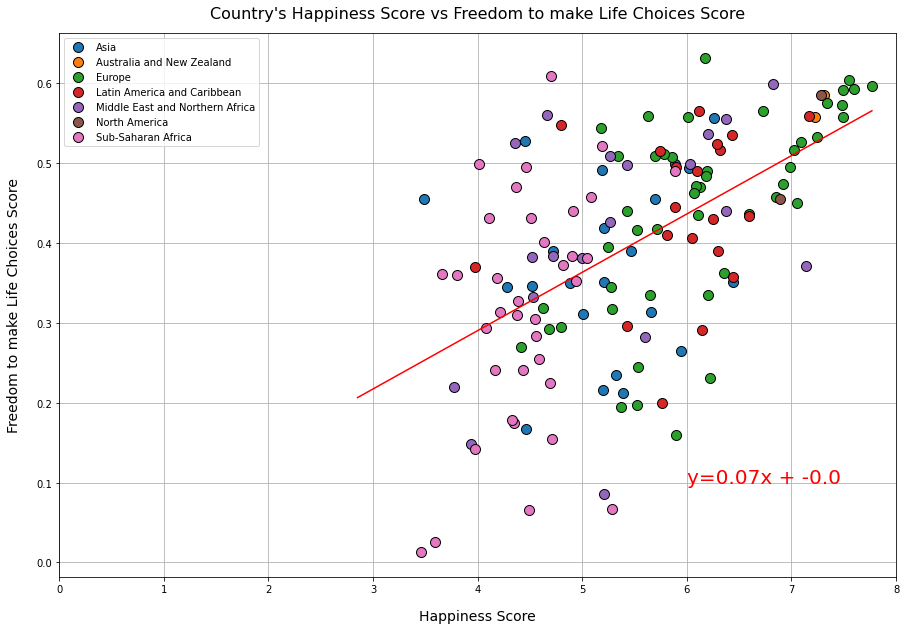

In [11]:
#scatter plot away!

#scatter plot: happiness score vs Freedom to make Life Choices

#establish x and y values
x_values = csv_2019["Score"]
y_values = csv_2019["Freedom to make life choices"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2019["Country or region"]
region = merged_2019["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Freedom to make Life Choices Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Freedom to make Life Choices Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.1), fontsize =20, color = "red")
plt.show()

slope:0.01
intercept:0.15
R-squared: 0.0057
y=0.01x + 0.15


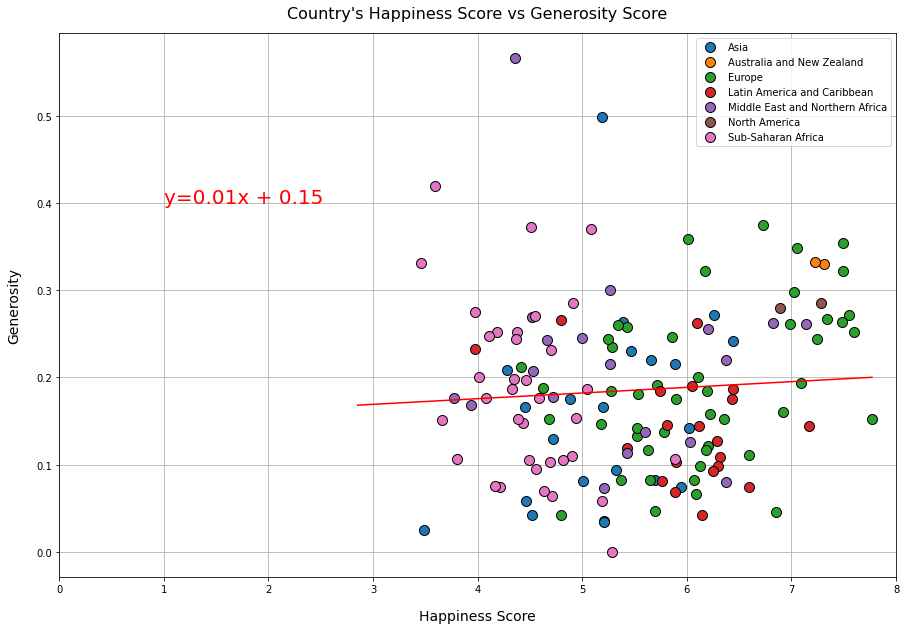

In [12]:
#scatter plot away!

#scatter plot: happiness score vs Generosity

#establish x and y values
x_values = csv_2019["Score"]
y_values = csv_2019["Generosity"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2019["Country or region"]
region = merged_2019["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Generosity", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Generosity Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1, 0.4), fontsize =20, color = "red")
plt.show()

slope:0.03
intercept:-0.07
R-squared: 0.1487
y=0.03x + -0.07


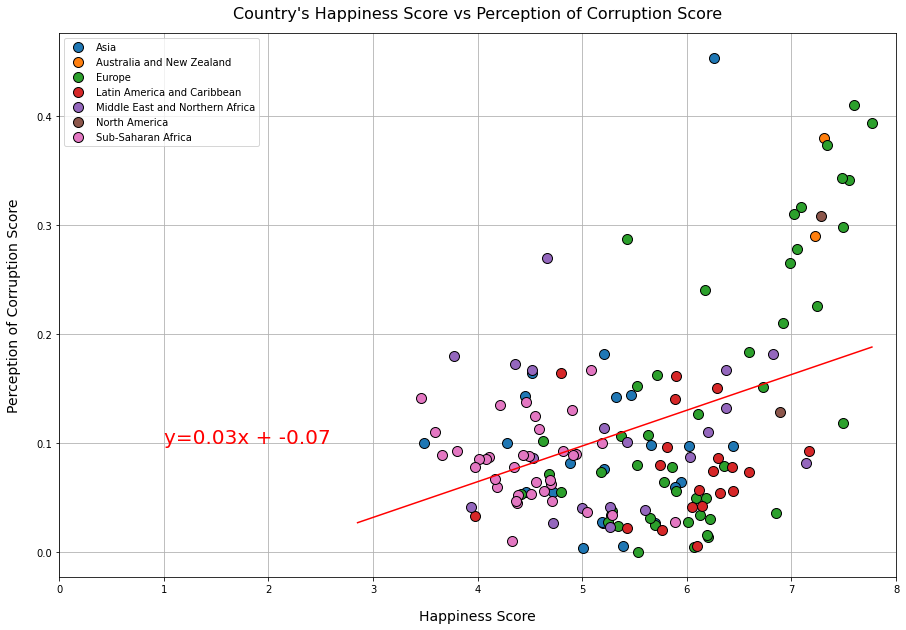

In [14]:
#scatter plot away!

#scatter plot: happiness score vs Perceptions of corruption

#establish x and y values
x_values = csv_2019["Score"]
y_values = csv_2019["Perceptions of corruption"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2019["Country or region"]
region = merged_2019["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Perception of Corruption Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Perception of Corruption Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1,0.1), fontsize =20, color = "red")
plt.show()